In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
from matplotlib.ticker import PercentFormatter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



## First import the sample data

In [2]:

loandata = pd.read_csv('LoanApplicantData.csv')
loandata_original = loandata.copy()

## Now let's start summarizing the data

In [3]:
# Below is just basic summary of the sample data
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loandata.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


__Lets try to understand the basic of the training data present like number of entries, columns, structure etc
This will help us in analysis of the data__

In [5]:
loandata.shape

(614, 13)

In [6]:
loandata.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loandata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
loandata['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

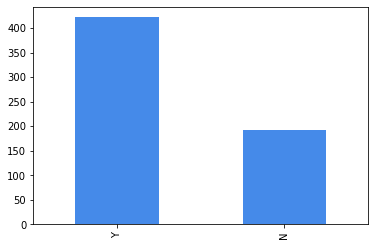

In [9]:
loandata['Loan_Status'].value_counts().plot.bar(color='#458ae9')

### First Basic Observation

* This plot actually shows 68.7% of the loans were approved. 

*Now we can visualise each significant variable separately*

### Categorical features

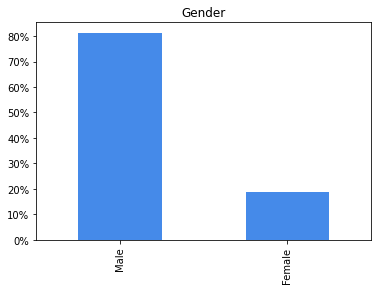

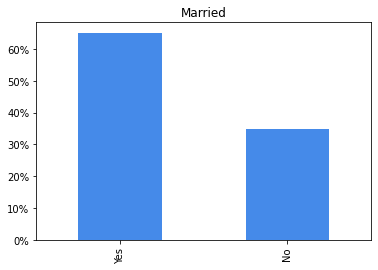

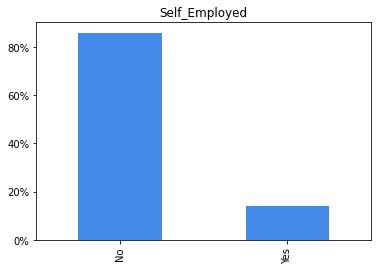

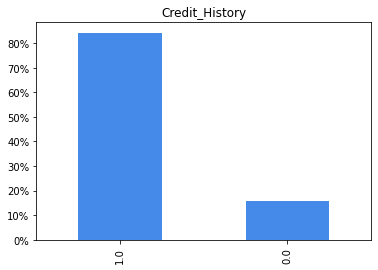

In [10]:
#Gender, Married, Self Employed and Credit History are categorical features

loandata['Gender'].value_counts(normalize=True).plot.bar(title='Gender', color='#458ae9')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
loandata['Married'].value_counts(normalize=True).plot.bar(title='Married', color='#458ae9')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
loandata['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color='#458ae9')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
loandata['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color='#458ae9')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Observations
**It can be inferred from the above bar plots that:**
* 80% of applicants in the dataset are male while 20% are female.
* Around 65% of the applicants in the dataset are married.
* Around 15% of applicants in the dataset are self-employed.
* Around 85% of applicants have repaid their doubts.

### Ordinal Features

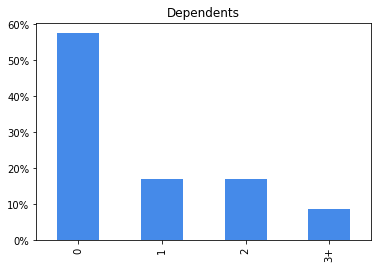

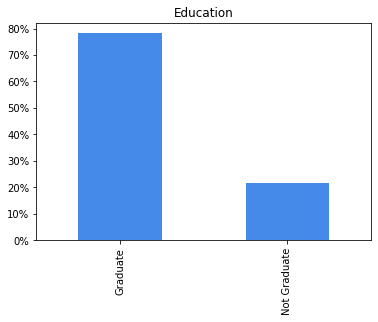

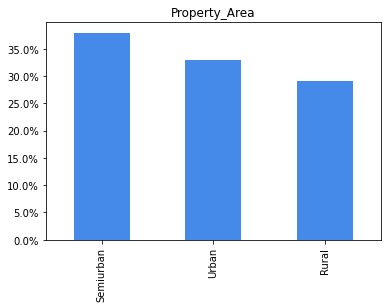

In [11]:
# Dependents, Education and Property area are ordinals

loandata['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents', color='#458ae9')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
loandata['Education'].value_counts(normalize=True).plot.bar(title='Education', color='#458ae9')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
loandata['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area', color='#458ae9')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Observations
**The following inferences can be made from the above bar plots**
* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from the Semiurban area.

### Numerical Features

This is a bit complicated to realize.

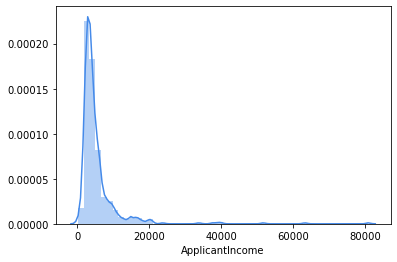

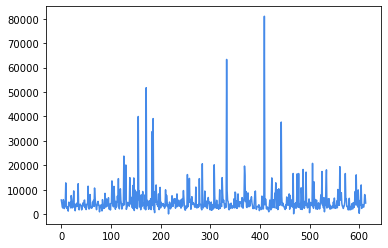

In [12]:
# Applicant income is numerical feature

sns.distplot(loandata['ApplicantIncome'], color='#458ae9')
plt.show()
loandata['ApplicantIncome'].plot(color='#458ae9')
plt.show()

### Observations
**The following inferences can be made from the above plots**
* The income of the applicants is generally skewed towards left as most of the applicants have income between 10000 and 22000

Text(0.5, 0.98, 'Application Income to Education')

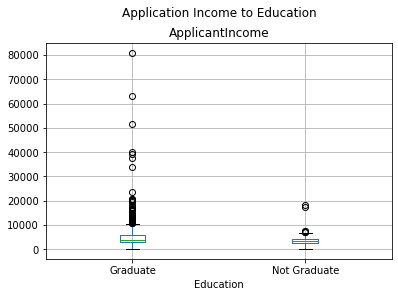

In [13]:
# Applicant income distribution compared with education

loandata.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle(t="Application Income to Education", va='bottom')

* It can be seen that graduates have higher income than non graduate. There are ofcourse some outliers in the graduates

## Identifying relevant, irrelevant attributes for building model. 

**To identify relevant attributes we need to do Bivariate Analysis.
Comparing the independent attributes with loan status can give us which attributes have significant impact on the loan application acceptance**

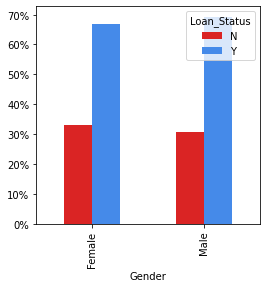

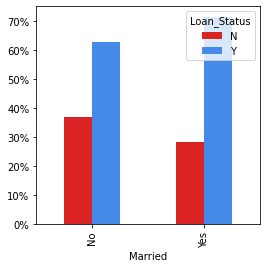

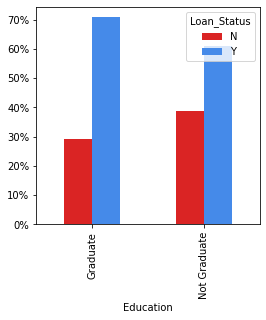

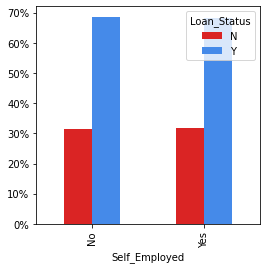

In [14]:
# Lets take all the categorical features first
# And compare it with loan status

GenderToLoanDistribution=pd.crosstab(loandata['Gender'],loandata['Loan_Status'])

MarriedToLoanDistribution=pd.crosstab(loandata['Married'],loandata['Loan_Status'])

EducationToLoanDistribution=pd.crosstab(loandata['Education'],loandata['Loan_Status'])

Self_EmployedToLoanDistribution=pd.crosstab(loandata['Self_Employed'],loandata['Loan_Status'])

GenderToLoanDistribution.div(GenderToLoanDistribution.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(4,4), color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
MarriedToLoanDistribution.div(MarriedToLoanDistribution.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(4,4), color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
EducationToLoanDistribution.div(EducationToLoanDistribution.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(4,4), color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
Self_EmployedToLoanDistribution.div(Self_EmployedToLoanDistribution.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(4,4), color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

__Following points can be inferred from the above plots__

* The proportion of male and female applicants is similar for both approved and unapproved loans.
* The proportion of married applicants is higher for approved loans.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.


So the employment type "Self_Employed" seems to be __irrelevant__ attribute





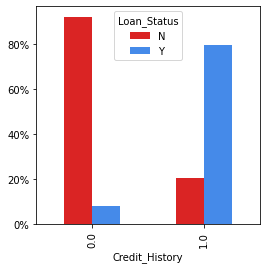

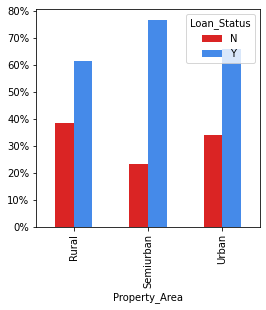

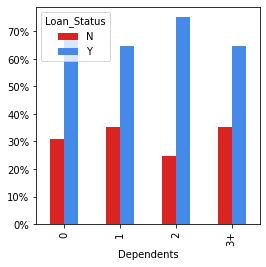

In [15]:
# Now lets take ordinal attributes

Credit_HistoryToLoanDistribution=pd.crosstab(loandata['Credit_History'],loandata['Loan_Status'])
Property_AreaToLoanDistribution=pd.crosstab(loandata['Property_Area'],loandata['Loan_Status'])
DependentsToLoanDistribution=pd.crosstab(loandata['Dependents'],loandata['Loan_Status'])
Credit_HistoryToLoanDistribution.div(Credit_HistoryToLoanDistribution.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(4,4), color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
Property_AreaToLoanDistribution.div(Property_AreaToLoanDistribution.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(4,4), color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
DependentsToLoanDistribution.div(DependentsToLoanDistribution.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(4,4), color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

__Following points can be inferred from the above plots__


* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* It seems people with a credit history as 1 are more likely to get their loans approved.
* The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.


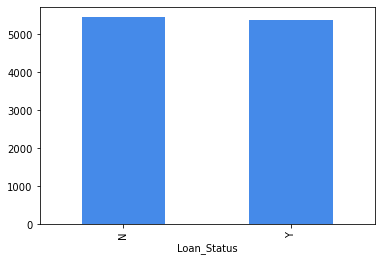

In [16]:
# Now the numerical attribute
loandata.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=['#458ae9'])
plt.show()

*As this data does not express any significant distribution to signal whether the loan is approved or not for the mean salary of 5000, we cannot use this.*

An alternative way would be to do __binning__ i.e. creating bins.

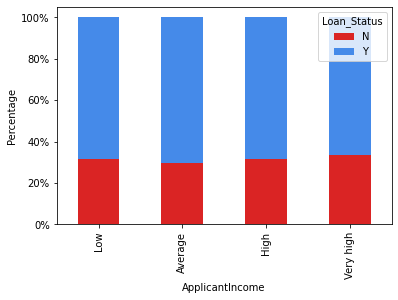

In [17]:
income_bins=[0,2500,4000,6000,81000]
income_group=['Low','Average','High','Very high']
loandata['App_Income_bin']=pd.cut(loandata['ApplicantIncome'],income_bins,labels=income_group)
App_Income_bin=pd.crosstab(loandata['App_Income_bin'],loandata['Loan_Status'])
App_Income_bin.div(App_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

__Even this plot does not have too much variation for Income bins. So there does not seem to be high dependency on loan approval to applicant income directly.__
*Let's try with co-applicant's income and see*

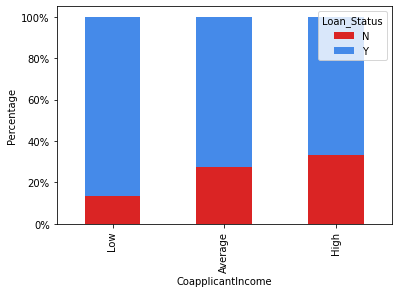

In [18]:
co_applicant_bins=[0,1000,3000,42000]
co_applicant_group=['Low','Average','High']
loandata['Coapplicant_Income_bin']=pd.cut(loandata['CoapplicantIncome'],co_applicant_bins,labels=co_applicant_group)
Coapplicant_Income_bin=pd.crosstab(loandata['Coapplicant_Income_bin'],loandata['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But it is possible that this might be happening because most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant’s and co-applicants income to visualize the combined effect of income on loan approval.

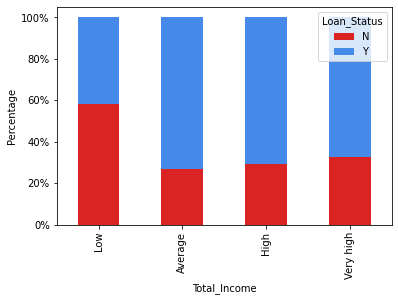

In [19]:
# Combining the coapplicant and applicant income together
loandata['Total_Income']=loandata['ApplicantIncome']+loandata['CoapplicantIncome']
total_income_bins=[0,2500,4000,6000,81000]
total_income_group=['Low','Average','High','Very high']
loandata['Total_Income_bin']=pd.cut(loandata['Total_Income'],total_income_bins,labels=total_income_group)
Total_Income_bin=pd.crosstab(loandata['Total_Income_bin'],loandata['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

__Following points can be inferred from the above plots__
* The chance of loan being approved is higher for applicants with Average, High and Very high combined total income as compared to low income

__Let's also do a comparision between loan amount and its approval chance__

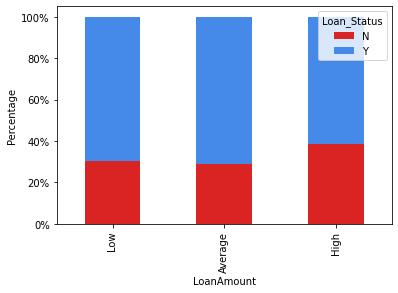

In [20]:

loan_amount_bins=[0,100,200,700]
loan_amount_group=['Low','Average','High']
loandata['LoanAmount_bin']=pd.cut(loandata['LoanAmount'],loan_amount_bins,labels=loan_amount_group)
LoanAmount_bin=pd.crosstab(loandata['LoanAmount_bin'],loandata['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, color=['#da2424','#458ae9'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

__Following points can be inferred from the above plots__
* The proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount

*Now let's do some cleanup*

In [21]:
# Now let's do some cleanup by dropping the bins we created and irrelevant attribute
loandata=loandata.drop(['App_Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income', 'Self_Employed'], axis=1)

## Performing appropriate data transformations with justifications

* We will change the 3+ in dependents variable to 3 to make it a numerical variable. 
* We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input.
* We will replace N with 0 and Y with 1.

In [22]:
loandata['Dependents'].replace('3+', 4,inplace=True)
loandata['Dependents'].replace('3+', 4,inplace=True)
loandata['Loan_Status'].replace('N', 0,inplace=True)
loandata['Loan_Status'].replace('Y', 1,inplace=True)

## Correlation between all the numerical variables 

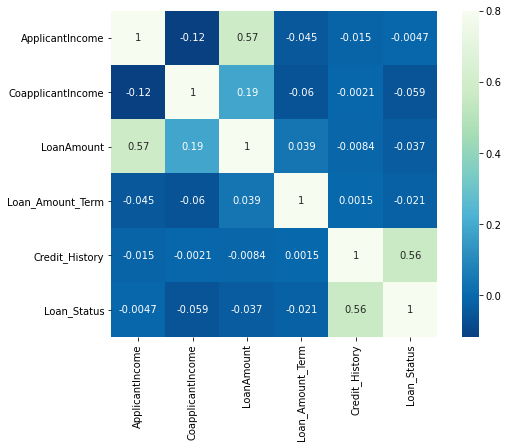

In [23]:
correlation_mx = loandata.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(correlation_mx,vmax=.8,square=True,cmap='GnBu_r', annot = True)

__Important observations here are__

* Applicant Income - Loan Amount are highly correlated
* Credit History - Loan status are highly correlated
* Coapplicant income also has some signifance to loan amount

## Refinement, Missing Values and Outlier management

### Missing Values

In [24]:
# Which all features have missing values and their total

loandata.isna().sum() > 0

#This gives the fields which have missing values


Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

__The fields which have missing values are__
1. Gender
2. Married
3. Dependents
4. LoanAmount
5. Loan_Amount_Term
6. Credit_History

Let's solve them one by one

1. __Gender__: This is categorical variable so let's use __mode__ for filling the data

In [25]:
mode_gender = loandata['Gender'].mode()[0]
loandata['Gender'].fillna(mode_gender, inplace=True)

2. __Married__: Another categorical variable, so we use __mode__

In [26]:
mode_married = loandata['Married'].mode()[0]
loandata['Married'].fillna(mode_married, inplace=True)

3. __Dependents__: Another categorical variable, so we use __mode__

In [27]:
mode_dependents = loandata['Dependents'].mode()[0]
loandata['Dependents'].fillna(mode_dependents, inplace=True)

4. __LoanAmount__: Numberical variable so lets use __median__

In [28]:
median_loan_amount = loandata['LoanAmount'].median()
loandata['LoanAmount'].fillna(median_loan_amount, inplace=True)

5. __Loan_Amount_Term__: Categorical variable so we use __mode__

In [29]:
mode_loan_amount_term = loandata['Loan_Amount_Term'].mode()[0]
loandata['Loan_Amount_Term'].fillna(mode_loan_amount_term, inplace=True)

6. Credit_History: Categorical again so we use mode

In [30]:
mode_credit_history = loandata['Credit_History'].mode()[0]
loandata['Credit_History'].fillna(mode_credit_history, inplace=True)

Now verify if all the missing fields are filled

In [31]:
loandata.isna().sum() > 0

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

### Duplicate Values

In [32]:
# Check if any column is duplicated
loandata.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

Since no column is duplicate, let's check if any row is duplicate

In [33]:
loandata.drop_duplicates(inplace= True)
loandata.shape

(614, 12)

### Outlier Management

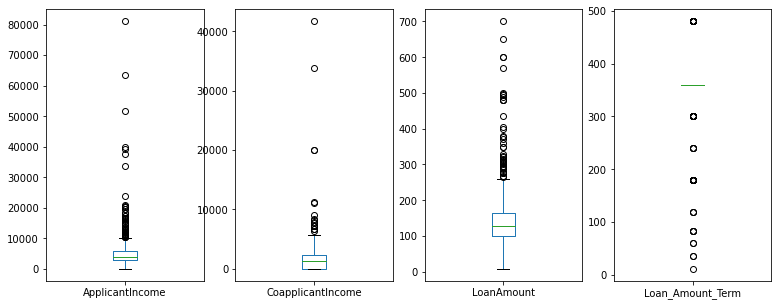

In [34]:
## This plot helps to identify outliners of data
# box and whisker plots
data = pd.DataFrame(loandata, columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
data.plot.box(subplots=True, figsize=(13,5))
plt.show()

__Lets fix the Loan Amount outliers using log transformation__

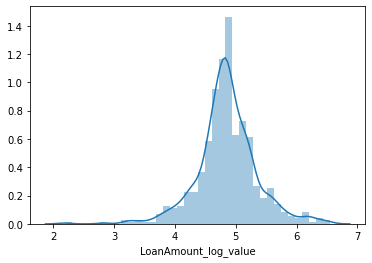

In [35]:
loandata['LoanAmount_log_value']=np.log(loandata['LoanAmount'])
sns.distplot(loandata['LoanAmount_log_value'])

## Feature introduction and Refinement

Lets add some necessary features which will be helpful.


__Total Income__: The Applicant Income and CoApplicant Income individually has not that high impact but Total income has high impact on the Loan Amount.

In [36]:
loandata['Total_Income']=loandata['ApplicantIncome']+loandata['CoapplicantIncome']

__EMI__: It is the amount which the customer will have to pay every month.

In [37]:
loandata['EMI']=loandata['LoanAmount']/loandata['Loan_Amount_Term']

__Balance Amount__: This is amount left for customer per month for use. If this amount is low, then the loan might not be approved.

In [38]:
loandata['Balance_Income'] = loandata['Total_Income']-(loandata['EMI']*1000)

Now lets normalize the outliers

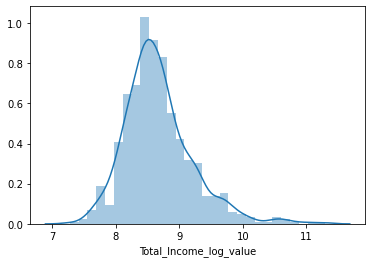

In [39]:
loandata['Total_Income_log_value']=np.log(loandata['Total_Income'])
sns.distplot(loandata['Total_Income_log_value'])

Now let's remove the unnecessary features since we created the new features

In [40]:
loandata = loandata.drop([
    'ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID'
], axis=1)

In [41]:
loandata.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Credit_History',
       'Property_Area', 'Loan_Status', 'LoanAmount_log_value', 'EMI',
       'Balance_Income', 'Total_Income_log_value'],
      dtype='object')

## Model Building

__Step 1__ To build the model, first we should spilt the sample data into training data and test data

In [42]:
X = loandata.drop('Loan_Status',1)
y = loandata.Loan_Status
X = pd.get_dummies(X)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.2)

## Applying Various models for evaluation

### Logistic Regression

In [43]:
logregression = LogisticRegression(max_iter=200)
logregression.fit(x_train, y_train)
LogisticRegression()

pred_cv = logregression.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8455284552845529

In [44]:
# to finally evaluate the models
results = []
names = []
models = []

### Logistic Regression using K-Fold

In [45]:
i=1
mean = 0
result = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
logRegModel = LogisticRegression(random_state=1, max_iter=300)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 
 xtd = X.loc[train_index]
 xvalue = X.loc[test_index]
 
 ytd = y[train_index]
 yvalue = y[test_index]
 
 logRegModel.fit(xtd,ytd)
 
 pred_test=logRegModel.predict(xvalue)
 score=accuracy_score(yvalue,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 
 result.append(score)

print ('\n Mean Validation Accuracy',mean/(i-1))
models.append(('LR', logRegModel))
results.append(result)
names.append('LR')


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.8045315207250432


### Decision Tree Classifier Method

In [46]:
i=1
mean = 0
result = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
dectreeModel = DecisionTreeClassifier(random_state=1)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 
 xtd = X.loc[train_index]
 xvalue = X.loc[test_index]
 
 ytd = y[train_index]
 yvalue = y[test_index]
 
 dectreeModel.fit(xtd,ytd)
 
 pred_test=dectreeModel.predict(xvalue)
 score=accuracy_score(yvalue,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 result.append(score)

print ('\n Mean Validation Accuracy',mean/(i-1))
models.append(('DTree', dectreeModel))
results.append(result)
names.append('DTree')


1 of kfold 5 
accuracy_score 0.7154471544715447

2 of kfold 5 
accuracy_score 0.7235772357723578

3 of kfold 5 
accuracy_score 0.7317073170731707

4 of kfold 5 
accuracy_score 0.7317073170731707

5 of kfold 5 
accuracy_score 0.6229508196721312

 Mean Validation Accuracy 0.7050779688124751


### K-Neighbors Classifier Method

In [47]:
i=1
mean = 0
result = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
kneighourModel = KNeighborsClassifier()
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 
 xtd = X.loc[train_index]
 xvalue = X.loc[test_index]
 
 ytd = y[train_index]
 yvalue = y[test_index]
 
 kneighourModel.fit(xtd,ytd)
 
 pred_test=kneighourModel.predict(xvalue)
 score=accuracy_score(yvalue,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 result.append(score)

print ('\n Mean Validation Accuracy',mean/(i-1))
models.append(('KN', kneighourModel))
results.append(result)
names.append('KN')


1 of kfold 5 
accuracy_score 0.6341463414634146

2 of kfold 5 
accuracy_score 0.6585365853658537

3 of kfold 5 
accuracy_score 0.5853658536585366

4 of kfold 5 
accuracy_score 0.5772357723577236

5 of kfold 5 
accuracy_score 0.5819672131147541

 Mean Validation Accuracy 0.6074503531920564


### Support Vector Machine Classifier

In [48]:
i=1
mean = 0
result = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
svcModel = SVC(gamma='auto')
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 
 xtd = X.loc[train_index]
 xvalue = X.loc[test_index]
 
 ytd = y[train_index]
 yvalue = y[test_index]
 
 svcModel.fit(xtd,ytd)
 
 pred_test=svcModel.predict(xvalue)
 score=accuracy_score(yvalue,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 result.append(score)

print ('\n Mean Validation Accuracy',mean/(i-1))
models.append(('SVM', svcModel))
results.append(result)
names.append('SVM')


1 of kfold 5 
accuracy_score 0.6504065040650406

2 of kfold 5 
accuracy_score 0.6747967479674797

3 of kfold 5 
accuracy_score 0.6504065040650406

4 of kfold 5 
accuracy_score 0.6666666666666666

5 of kfold 5 
accuracy_score 0.6065573770491803

 Mean Validation Accuracy 0.6497667599626815


### Random Forest Classifier

In [49]:
from sklearn.model_selection import cross_val_score
i=1
mean = 0
result = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
rfcModel = RandomForestClassifier(random_state=1, max_depth=10)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 
 xtd = X.loc[train_index]
 xvalue = X.loc[test_index]
 
 ytd = y[train_index]
 yvalue = y[test_index]
 
 rfcModel.fit(xtd,ytd)
 
 pred_test=rfcModel.predict(xvalue)
 score=accuracy_score(yvalue,pred_test)
 mean += score
 
 print ('accuracy_score',score)
 i+=1
 result.append(score)

print ('\n Mean Validation Accuracy',mean/(i-1))
models.append(('RFC', rfcModel))
results.append(result)
names.append('RFC')


1 of kfold 5 
accuracy_score 0.8211382113821138

2 of kfold 5 
accuracy_score 0.7967479674796748

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.7967479674796748

5 of kfold 5 
accuracy_score 0.7786885245901639

 Mean Validation Accuracy 0.7963881114220979


__Lets do some basic metric estimations for all these models. We are running the models only once instead of 5 times so these details are nearby estimates__

In [50]:
for name, model in models:
  y_pred = model.fit(x_train, y_train).predict(x_cv)
  print('Prediction: %s %f ' % (name, (y_cv != y_pred).sum()))

  # Evaluate predictions
  print(confusion_matrix(y_cv, y_pred))
  print(classification_report(y_cv, y_pred))

  print()
  print()

Prediction: LR 19.000000 
[[22 16]
 [ 3 82]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



Prediction: DTree 34.000000 
[[24 14]
 [20 65]]
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.82      0.76      0.79        85

    accuracy                           0.72       123
   macro avg       0.68      0.70      0.69       123
weighted avg       0.74      0.72      0.73       123



Prediction: KN 53.000000 
[[ 3 35]
 [18 67]]
              precision    recall  f1-score   support

           0       0.14      0.08      0.10        38
           1       0.66      0.79      0.72        85

    accuracy                           0

## Comparision of All Algorithms

Text(0.5, 1.0, 'Comparision of Models')

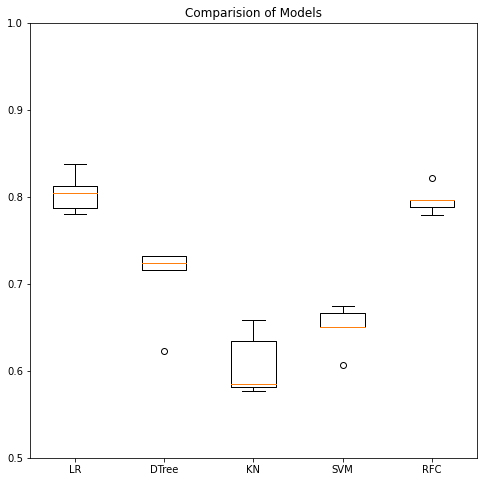

In [51]:
np_data = np.array(results)
np_data = np.transpose(np_data)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.boxplot(np_data, labels=names, vert=True)
plt.ylim(0.50, 1.0)
plt.title('Comparision of Models')

## Final Notes

This way we can choose the best suited model for this prediction.

We can use these models against some test data and then get even better prediction accuracies.
